In [12]:
import requests
import yfinance as yf # Used to grab the stock prices, with yahoo
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from utils.MCForecastTools import MCSimulation

In [13]:
amazon = yf.Ticker("AMZN")
walmart = yf.Ticker("WMT")
ebay = yf.Ticker("EBAY")
target = yf.Ticker("TGT")
overstock = yf.Ticker("OSTK")
print(walmart)

yfinance.Ticker object <WMT>


In [14]:
total_investment = 500000

#Amazon Data
initial_amazon_price = 1627.800049
initial_amazon_investment = 100000
amount_of_amazon_stock = initial_amazon_investment/initial_amazon_price
current_amazon_price = amazon.info['open']
current_amazon_investment_value = current_amazon_price * amount_of_amazon_stock

#Walmart Data
initial_walmart_price = 97.519066
initial_walmart_investment = 100000
amount_of_walmart_stock = initial_walmart_investment/initial_walmart_price
current_walmart_price = walmart.info['open']
current_walmart_investment_value = current_walmart_price * amount_of_walmart_stock

#Ebay Data
initial_ebay_price = 28.541014
initial_ebay_investment = 100000
amount_of_ebay_stock = initial_ebay_investment/initial_ebay_price
current_ebay_price = ebay.info['open']
current_ebay_investment_value = current_ebay_price * amount_of_ebay_stock

#Target Data
initial_target_price = 79.590614
initial_target_investment = 100000
amount_of_target_stock = initial_target_investment/initial_target_price
current_target_price = target.info['open']
current_target_investment_value = current_target_price * amount_of_target_stock

#Overstock Data
initial_overstock_price = 19.799999
initial_overstock_investment = 100000
amount_of_overstock_stock = initial_overstock_investment/initial_overstock_price
current_overstock_price = overstock.info['open']
current_overstock_investment_value = current_overstock_price * amount_of_overstock_stock


print("Current Amazon Price:",current_amazon_price)
print("Current Amazon Investment Value:",current_amazon_investment_value)
print("Current Walmart Price:",current_walmart_price)
print("Current Walmart Investment Value:",current_walmart_investment_value)
print("Current Ebay Price:",current_ebay_price)
print("Current Ebay Investment Value:",current_ebay_investment_value)
print("Current Target Price:",current_target_price)
print("Current Target Investment Value:",current_target_investment_value)
print("Current Overstock Price:",current_overstock_price)
print("Current Overstock Investment Value:",current_overstock_investment_value)

Current Amazon Price: 3523.24
Current Amazon Investment Value: 216441.81680449133
Current Walmart Price: 150.22
Current Walmart Investment Value: 154041.6722202815
Current Ebay Price: 75.79
Current Ebay Investment Value: 265547.6781588769
Current Target Price: 253.25
Current Target Investment Value: 318190.785662239
Current Overstock Price: 106.06
Current Overstock Investment Value: 535656.5927099289


# Amazon Expected Rate of Return Calculations

In [15]:
amazon_historical_year1_begin = amazon.history(start="2018-11-05", end="2018-11-06")
amazon_historical_year1_end = amazon.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_amazon = amazon_historical_year1_begin['Close']['2018-11-05']
current_value_year1_amazon= amazon_historical_year1_end['Close']['2019-11-05']

In [16]:
year1_ror_amazon = ((current_value_year1_amazon - initial_value_year1_amazon)/initial_value_year1_amazon)*100

year1_ror_amazon

10.683739211985838

In [17]:
amazon_historical_year2_begin = amazon.history(start="2019-11-05", end="2019-11-06")
amazon_historical_year2_end = amazon.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_amazon = amazon_historical_year2_begin['Close']['2019-11-05']
current_value_year2_amazon= amazon_historical_year2_end['Close']['2020-11-05']

In [18]:
year2_ror_amazon = ((current_value_year2_amazon - initial_value_year2_amazon)/initial_value_year2_amazon)*100

year2_ror_amazon

84.38039817859662

In [19]:
amazon_historical_year3_begin = amazon.history(start="2020-11-05", end="2020-11-06")
amazon_historical_year3_end = amazon.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_amazon = amazon_historical_year3_begin['Close']['2020-11-05']
current_value_year3_amazon= amazon_historical_year3_end['Close']['2021-11-03']

In [20]:
year3_ror_amazon = ((current_value_year3_amazon - initial_value_year3_amazon)/initial_value_year3_amazon)*100

year3_ror_amazon

1.8663455749548463

In [21]:
expected_ror_amazon = (year1_ror_amazon + year2_ror_amazon + year3_ror_amazon)/3

expected_ror_amazon

32.310160988512436

# Walmart Expected Rate of Return Calculations

In [22]:
walmart_historical_year1_begin = walmart.history(start="2018-11-05", end="2018-11-06")
walmart_historical_year1_end = walmart.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_wmt = walmart_historical_year1_begin['Close']['2018-11-05']
current_value_year1_wmt= walmart_historical_year1_end['Close']['2019-11-05']

In [23]:
year1_ror_wmt = ((current_value_year1_wmt - initial_value_year1_wmt)/initial_value_year1_wmt)*100

year1_ror_wmt

17.952111939766628

In [24]:
walmart_historical_year2_begin = walmart.history(start="2019-11-05", end="2019-11-06")
walmart_historical_year2_end = walmart.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_wmt = walmart_historical_year2_begin['Close']['2019-11-05']
current_value_year2_wmt= walmart_historical_year2_end['Close']['2020-11-05']

In [25]:
year2_ror_wmt = ((current_value_year2_wmt - initial_value_year2_wmt)/initial_value_year2_wmt)*100

year2_ror_wmt

22.82150025270849

In [26]:
walmart_historical_year3_begin = walmart.history(start="2020-11-05", end="2020-11-06")
walmart_historical_year3_end = walmart.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_wmt = walmart_historical_year3_begin['Close']['2020-11-05']
current_value_year3_wmt= walmart_historical_year3_end['Close']['2021-11-03']

In [27]:
year3_ror_wmt = ((current_value_year3_wmt - initial_value_year3_wmt)/initial_value_year3_wmt)*100

year3_ror_wmt

6.302263743819454

In [28]:
expected_ror_wmt = (year1_ror_wmt + year2_ror_wmt + year3_ror_wmt)/3

expected_ror_wmt

15.691958645431521

# Ebay Expected Rate of Return Calculations

In [29]:
ebay_historical_year1_begin = ebay.history(start="2018-11-05", end="2018-11-06")
ebay_historical_year1_end = ebay.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_ebay = ebay_historical_year1_begin['Close']['2018-11-05']
current_value_year1_ebay= ebay_historical_year1_end['Close']['2019-11-05']

In [30]:
year1_ror_ebay = ((current_value_year1_ebay - initial_value_year1_ebay)/initial_value_year1_ebay)*100

year1_ror_ebay

21.03653685418853

In [31]:
ebay_historical_year2_begin = ebay.history(start="2019-11-05", end="2019-11-06")
ebay_historical_year2_end = ebay.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_ebay = ebay_historical_year2_begin['Close']['2019-11-05']
current_value_year2_ebay= ebay_historical_year2_end['Close']['2020-11-05']

In [32]:
year2_ror_ebay = ((current_value_year2_ebay - initial_value_year2_ebay)/initial_value_year2_ebay)*100

year2_ror_ebay

41.37556535702825

In [33]:
ebay_historical_year3_begin = ebay.history(start="2020-11-05", end="2020-11-06")
ebay_historical_year3_end = ebay.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_ebay = ebay_historical_year3_begin['Close']['2020-11-05']
current_value_year3_ebay= ebay_historical_year3_end['Close']['2021-11-03']

In [34]:
year3_ror_ebay = ((current_value_year3_ebay - initial_value_year3_ebay)/initial_value_year3_ebay)*100

year3_ror_ebay

54.48947683610462

In [35]:
expected_ror_ebay = (year1_ror_ebay + year2_ror_ebay + year3_ror_ebay)/3

expected_ror_ebay

38.9671930157738

# Target Expected Rate of Return Calculations

In [36]:
target_historical_year1_begin = target.history(start="2018-11-05", end="2018-11-06")
target_historical_year1_end = target.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_target = target_historical_year1_begin['Close']['2018-11-05']
current_value_year1_target= target_historical_year1_end['Close']['2019-11-05']

In [37]:
year1_ror_target = ((current_value_year1_target - initial_value_year1_target)/initial_value_year1_target)*100

year1_ror_target

33.37207592487113

In [38]:
target_historical_year2_begin = target.history(start="2019-11-05", end="2019-11-06")
target_historical_year2_end = target.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_target = target_historical_year2_begin['Close']['2019-11-05']
current_value_year2_target= target_historical_year2_end['Close']['2020-11-05']

In [39]:
year2_ror_target = ((current_value_year2_target - initial_value_year2_target)/initial_value_year2_target)*100

year2_ror_target

47.307620628610564

In [40]:
target_historical_year3_begin = target.history(start="2020-11-05", end="2020-11-06")
target_historical_year3_end = target.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_target = target_historical_year3_begin['Close']['2020-11-05']
current_value_year3_target= target_historical_year3_end['Close']['2021-11-03']

In [41]:
year3_ror_target = ((current_value_year3_target - initial_value_year3_target)/initial_value_year3_target)*100

year3_ror_target

66.53502906761157

In [42]:
expected_ror_target = (year1_ror_target + year2_ror_target + year3_ror_target)/3

expected_ror_target

49.071575207031096

# Overstock Expected Rate of Return Calculations

In [43]:
overstock_historical_year1_begin = overstock.history(start="2018-11-05", end="2018-11-06")
overstock_historical_year1_end = overstock.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_overstock = overstock_historical_year1_begin['Close']['2018-11-05']
current_value_year1_overstock= overstock_historical_year1_end['Close']['2019-11-05']

In [44]:
year1_ror_overstock = ((current_value_year1_overstock - initial_value_year1_overstock)/initial_value_year1_overstock)*100

year1_ror_overstock

-49.34343374015091

In [45]:
overstock_historical_year2_begin = overstock.history(start="2019-11-05", end="2019-11-06")
overstock_historical_year2_end = overstock.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_overstock = overstock_historical_year2_begin['Close']['2019-11-05']
current_value_year2_overstock= overstock_historical_year2_end['Close']['2020-11-05']

In [46]:
year2_ror_overstock = ((current_value_year2_overstock - initial_value_year2_overstock)/initial_value_year2_overstock)*100

year2_ror_overstock

583.3499774702757

In [47]:
overstock_historical_year3_begin = overstock.history(start="2020-11-05", end="2020-11-06")
overstock_historical_year3_end = overstock.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_overstock = overstock_historical_year3_begin['Close']['2020-11-05']
current_value_year3_overstock= overstock_historical_year3_end['Close']['2021-11-03']

In [48]:
year3_ror_overstock = ((current_value_year3_overstock - initial_value_year3_overstock)/initial_value_year3_overstock)*100

year3_ror_overstock

52.90341647488361

In [49]:
expected_ror_overstock = (year1_ror_overstock + year2_ror_overstock + year3_ror_overstock)/3

expected_ror_overstock

195.6366534016695

In [50]:
amazon_history = amazon.history(period = "3y")

amazon_history['Close']

Date
2018-11-09    1712.430054
2018-11-12    1636.849976
2018-11-13    1631.170044
2018-11-14    1599.010010
2018-11-15    1619.439941
                 ...     
2021-11-02    3312.750000
2021-11-03    3384.000000
2021-11-04    3477.000000
2021-11-05    3518.989990
2021-11-08    3488.979980
Name: Close, Length: 754, dtype: float64

In [51]:
walmart_history = walmart.history(period = "3y")

walmart_history['Close']

Date
2018-11-09    100.030228
2018-11-12     98.428772
2018-11-13     97.547485
2018-11-14     96.211342
2018-11-15     94.325584
                 ...    
2021-11-02    149.720001
2021-11-03    150.179993
2021-11-04    151.279999
2021-11-05    150.229996
2021-11-08    149.270004
Name: Close, Length: 754, dtype: float64

In [52]:
ebay_history = ebay.history(period = "3y")

ebay_history['Close']

Date
2018-11-09    28.531385
2018-11-12    27.886227
2018-11-13    27.058113
2018-11-14    26.855900
2018-11-15    27.125519
                ...    
2021-11-02    74.900002
2021-11-03    75.449997
2021-11-04    76.279999
2021-11-05    75.570000
2021-11-08    73.760002
Name: Close, Length: 754, dtype: float64

In [53]:
target_history = target.history(period = "3y")

target_history['Close']

Date
2018-11-09     81.073334
2018-11-12     79.702530
2018-11-13     78.630119
2018-11-14     77.520409
2018-11-15     75.310364
                 ...    
2021-11-02    260.260010
2021-11-03    260.410004
2021-11-04    260.440002
2021-11-05    254.270004
2021-11-08    253.330002
Name: Close, Length: 754, dtype: float64

In [54]:
overstock_history = overstock.history(period = "3y")

overstock_history['Close']

Date
2018-11-09     17.200001
2018-11-12     17.760000
2018-11-13     17.790001
2018-11-14     16.950001
2018-11-15     17.530001
                 ...    
2021-11-02    101.360001
2021-11-03    104.800003
2021-11-04    104.889999
2021-11-05    104.459999
2021-11-08    105.360001
Name: Close, Length: 754, dtype: float64

In [55]:
start = datetime(2018, 11, 5)
symbols_list = ['AMZN', 'WMT', 'EBAY', 'TGT', 'OSTK']


In [56]:
overstock_df = pd.DataFrame(data = overstock_history['Close'])
target_df = pd.DataFrame(data = target_history['Close'])
ebay_df = pd.DataFrame(data = ebay_history['Close'])
walmart_df = pd.DataFrame(data = walmart_history['Close'])
amazon_df = pd.DataFrame(data = amazon_history['Close'])


dataframe = pd.concat([overstock_df, target_df, ebay_df, walmart_df, amazon_df], axis = 1)

dataframe.columns = [ "Overstock", "Target", "Ebay", "Walmart", "Amazon"]
display(dataframe)

,Overstock,Target,Ebay,Walmart,Amazon
Date,,,,,
2018-11-09,17.200001,81.073334,28.531385,100.030228,1712.430054
2018-11-12,17.760000,79.702530,27.886227,98.428772,1636.849976
2018-11-13,17.790001,78.630119,27.058113,97.547485,1631.170044
2018-11-14,16.950001,77.520409,26.855900,96.211342,1599.010010
2018-11-15,17.530001,75.310364,27.125519,94.325584,1619.439941
...,...,...,...,...,...
2021-11-02,101.360001,260.260010,74.900002,149.720001,3312.750000
2021-11-03,104.800003,260.410004,75.449997,150.179993,3384.000000
2021-11-04,104.889999,260.440002,76.279999,151.279999,3477.000000


In [57]:
corr_df = dataframe.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head(10)

,Overstock,Target,Ebay,Walmart,Amazon
Overstock,1.000000,0.826515,0.882009,0.804810,0.920837
Target,0.826515,1.000000,0.935679,0.896072,0.887219
Ebay,0.882009,0.935679,1.000000,0.851316,0.922186
Walmart,0.804810,0.896072,0.851316,1.000000,0.921042
Amazon,0.920837,0.887219,0.922186,0.921042,1.000000


<AxesSubplot:>

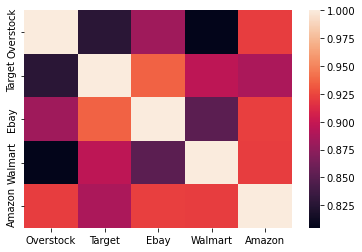

In [58]:
# Create a heatmap from the correlation values
sns.heatmap(corr_df)

# Overstock Portfolio Variances

In [59]:
overstock_std = float(overstock_df['Close'].std())/100
target_std = float(target_df['Close'].std())/100
ebay_std = float(ebay_df['Close'].std())/100
walmart_std = float(walmart_df['Close'].std())/100
amazon_std = float(amazon_df['Close'].std())/100

In [60]:
display(overstock_std)
display(target_std)
display(ebay_std)
display(walmart_std)
display(amazon_std)

0.32419739865788705

0.6040943125288759

0.1402612641194388

0.18663069791133766

7.222030855025548

In [61]:
def variance(weight1, std_1, weight2, std_2, corr_ratio):
    variance = (((weight1 ** 2) * (std_1 ** 2)) + ((weight2 ** 2) * (std_2 ** 2)) + ((weight1 ** 2) * (std_1 ** 2) * (weight2 ** 2) * (std_2 ** 2) * (corr_ratio)))
    return variance
                                                                                 

In [62]:
ostk_to_target_variance = variance(.50,overstock_std,.50,target_std,0.825182)
ostk_to_ebay_variance = variance(.50,overstock_std,.50,ebay_std,0.880374)
ostk_to_walmart_variance = variance(.50,overstock_std,.50,walmart_std,0.803650)
ostk_to_amazon_variance = variance(.50,overstock_std,.50,amazon_std,0.825182)

ostk_to_target_percentage = "{:.2%}".format(ostk_to_target_variance)
ostk_to_ebay_percentage = "{:.2%}".format(ostk_to_ebay_variance)
ostk_to_walmart_percentage = "{:.2%}".format(ostk_to_walmart_variance)
ostk_to_amazon_percentage = "{:.2%}".format(ostk_to_amazon_variance)

print("Overstock and Target Portfolio Variance",ostk_to_target_percentage)
print("Overstock and Ebay Portfolio Variance",ostk_to_ebay_percentage)
print("Overstock and Walmart Portfolio Variance",ostk_to_walmart_percentage)
print("Overstock and Amazon Portfolio Variance",ostk_to_amazon_percentage)

Overstock and Target Portfolio Variance 11.95%
Overstock and Ebay Portfolio Variance 3.13%
Overstock and Walmart Portfolio Variance 3.52%
Overstock and Amazon Portfolio Variance 1334.84%


In [63]:
tgt_to_ebay_variance = variance(.50,target_std,.50,ebay_std,0.935200)
tgt_to_walmart_variance = variance(.50,target_std,.50,walmart_std,0.895973)
tgt_to_amazon_variance = variance(.50,target_std,.50,amazon_std,0.887384)

tgt_to_ebay_percentage = "{:.2%}".format(tgt_to_ebay_variance)
tgt_to_walmart_percentage = "{:.2%}".format(tgt_to_walmart_variance)
tgt_to_amazon_percentage = "{:.2%}".format(tgt_to_amazon_variance)


print("Target and Ebay Portfolio Variance",tgt_to_ebay_percentage)
print("Target and Walmart Portfolio Variance",tgt_to_walmart_percentage)
print("Target and Amazon Portfolio Variance",tgt_to_amazon_percentage)

Target and Ebay Portfolio Variance 9.66%
Target and Walmart Portfolio Variance 10.07%
Target and Amazon Portfolio Variance 1418.63%


In [64]:
ebay_to_walmart_variance = variance(.50,ebay_std,.50,walmart_std,0.851683)
ebay_to_amazon_variance = variance(.50,ebay_std,.50,amazon_std,0.922619)

ebay_to_walmart_percentage = "{:.2%}".format(ebay_to_walmart_variance)
ebay_to_amazon_percentage = "{:.2%}".format(ebay_to_amazon_variance)


print("Ebay and Walmart Portfolio Variance",ebay_to_walmart_percentage)
print("Ebay and Amazon Portfolio Variance",ebay_to_amazon_percentage)

Ebay and Walmart Portfolio Variance 1.37%
Ebay and Amazon Portfolio Variance 1310.35%


In [65]:
walmart_to_amazon_variance = variance(.50,walmart_std,.50,amazon_std,0.921194)

walmart_to_amazon_percentage = "{:.2%}".format(walmart_to_amazon_variance)

print("Walmart and Amazon Portfolio Variance",walmart_to_amazon_percentage)

Walmart and Amazon Portfolio Variance 1315.27%


Monte Carlo Simulation

In [85]:
# Gathering historical data for our list of 5-10 Eommerce stocks from 2018-2021 and putting in into a dataframe

selected_stocks = yf.download("AMZN", group_by='tickers', start="2018-11-05", end="2021-11-04")
selected_stocks.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-05,1657.569946,1658.089966,1596.359985,1627.800049,1627.800049,5624700
2018-11-06,1618.349976,1665.000000,1614.550049,1642.810059,1642.810059,4257400
2018-11-07,1673.000000,1759.229980,1664.079956,1755.489990,1755.489990,8192200
2018-11-08,1755.000000,1784.000000,1725.109985,1754.910034,1754.910034,6534900
2018-11-09,1732.500000,1743.920044,1701.869995,1712.430054,1712.430054,5902200


In [84]:
# ecom_stocks.reset_index()
# selected_stocks.index = selected_stocks.index.date

,index,Open,High,Low,Close,Volume
0,2018-11-05,1657.569946,1658.089966,1596.359985,1627.800049,5624700
1,2018-11-06,1618.349976,1665.000000,1614.550049,1642.810059,4257400
2,2018-11-07,1673.000000,1759.229980,1664.079956,1755.489990,8192200
3,2018-11-08,1755.000000,1784.000000,1725.109985,1754.910034,6534900
4,2018-11-09,1732.500000,1743.920044,1701.869995,1712.430054,5902200
...,...,...,...,...,...,...
750,2021-10-28,3402.100098,3479.000000,3386.000000,3446.570068,5708700
751,2021-10-29,3300.020020,3374.820068,3273.320068,3372.429932,6469500
752,2021-11-01,3361.800049,3375.860107,3292.020020,3318.110107,3608900
753,2021-11-02,3315.010010,3331.120117,3283.550049,3312.750000,2627600


In [86]:
# cols = [4, 10, 16, 22, 28]
cols = [4]
ecom_stocks = selected_stocks.drop(selected_stocks.columns[cols], axis=1)
ecom_stocks

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-05,1657.569946,1658.089966,1596.359985,1627.800049,5624700
2018-11-06,1618.349976,1665.000000,1614.550049,1642.810059,4257400
2018-11-07,1673.000000,1759.229980,1664.079956,1755.489990,8192200
2018-11-08,1755.000000,1784.000000,1725.109985,1754.910034,6534900
2018-11-09,1732.500000,1743.920044,1701.869995,1712.430054,5902200
...,...,...,...,...,...
2021-10-28,3402.100098,3479.000000,3386.000000,3446.570068,5708700
2021-10-29,3300.020020,3374.820068,3273.320068,3372.429932,6469500
2021-11-01,3361.800049,3375.860107,3292.020020,3318.110107,3608900


In [90]:
# Formatting the column names into lower case
ecom_stocks.rename(str.lower, axis='columns')

,open,high,low,close,volume
Date,,,,,
2018-11-05,1657.569946,1658.089966,1596.359985,1627.800049,5624700
2018-11-06,1618.349976,1665.000000,1614.550049,1642.810059,4257400
2018-11-07,1673.000000,1759.229980,1664.079956,1755.489990,8192200
2018-11-08,1755.000000,1784.000000,1725.109985,1754.910034,6534900
2018-11-09,1732.500000,1743.920044,1701.869995,1712.430054,5902200
...,...,...,...,...,...
2021-10-28,3402.100098,3479.000000,3386.000000,3446.570068,5708700
2021-10-29,3300.020020,3374.820068,3273.320068,3372.429932,6469500
2021-11-01,3361.800049,3375.860107,3292.020020,3318.110107,3608900


In [ ]:
ecom_stocks.reset_index(level=1)


In [ ]:
one_year_simulation = MCSimulation(
    portfolio_data=ecom_stocks,
    weights=[0.25, 0.75],
    num_simulation=500,
    num_trading_days=252,
)

# Review the simulation input data
ecom_stocks.portfolio_data.dropna()
# ecom_stocks.calc_cumulative_return()